## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez TEAMS.

## Regresja wielomianowa

Regresja liniowa działa dobrze w sytuacji, gdy zmienna, której wartość chemy przewidzieć (zmienna objaśniana/zależna) jest liniowo zależna od zmiennych za pomocą których chcemy ją obliczyć (zmiennych objaśniających/niezależnych). Jak nietrudno się domyślić, takie założenie jest mocno ograniczające i w realnych problemach rzadko będzie ono spełniane. Pojawia się zatem pytanie, co zrobić, gdy wiemy, że dane nie spełniają założenia o liniowej zależności. Istnieje wiele algorytmów rozwiązujących takie problemy. Jednym z nich jest regresja wielomianowa.

Regresja wielomianowa polega na zmianie funkcji regresji tak, aby była to funkcja wielomianowa. Przykładowo, dla jednej zmiennej niezależnej można stworzyć model, którego funkcja regresji będzie wielomianem czwartego stopnia: 

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}

Pozwala to na stworzenie dowolnego kształtu funkcji, który będzie dopasowany do danych. Zwiekszanie krotności wielomianu spowoduje dokładniejsze dopasowanie do danych, jednak rodzi też pewne niebezpieczeństwa. Może okazać się, że taki model będzie zbyt mocno dopasowany do próbek uczących i nie będzie w stanie dokonywać poprawnych predykcji dla nowych, nieznanych próbek. Takie zjawisko nazywa się przeuczeniem modelu i istnieją różne metody do jego rozpoznania i przeciwdziałania. Nie jest to jednak przedmiotem tego notatnika. 

Cały proces trenowania i testowania modelu wygląda jak w przypadku regresji liniowej. Różnica polega jedynie na zmianie funkcji regresji.

Zbiór danych do tego zadania znajduje się w pliku "jaws.csv" i przedstawia zależność długości kości szczękowej jelenia od jego wieku. 

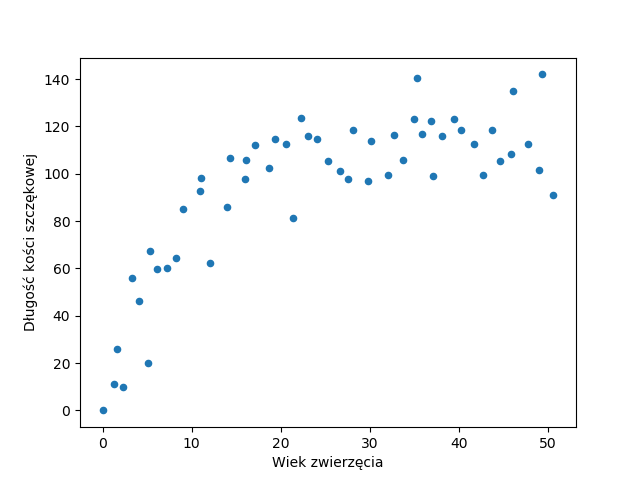

Na powyższym wykresie widać, że zależność na pewno nie jest liniowa. Szczęka zwierzęcia rośnie do pewnego wieku i później jej długość jest stała przez resztę życia. Spróbujemy rozwiązać ten problem za pomocą regresji wielomianowej.


### Zadanie 1
Aby stworzyć funkcję wielomianową konieczne jest dodanie nowych cech do istniejącego zestawu danych.  
Stwórz funkcję, która przetransformuje pojedynczą cechę do wektora cech, w którym kolejne elementy, to kolejne potęgi danej cechy. 

Przykład:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [81]:
import numpy as np

'''
input:
x - wartość zmiennej niezależnej
n - stopień wielomianu

output:
out: [] - lista o długości n z kolejnymi potęgami wejściowej cechy x
'''
def transform_to_polynomial_feature(x: np.ndarray, n: int) -> np.ndarray:
    out = []
    for i in range(1, n + 1):
        out.append(x ** i)
    return np.column_stack(out)

### Zadanie 2

Zmodyfikuj swój kod z zadania z regresją liniową tak, aby dla zestawu danych x z jedną zmienną niezależną tworzył nieliniową funkcję regresji. Przetestuj rozwiązanie dla różnych wariantów stopnia wielomianu.
Pamiętaj, że konieczne dodanie dodatkowych cech do oryginalnego zbioru danych, które będą kolejnymi potęgami zmiennej niezależnej - wiek zwierzęcia. 

**UWAGA:** Przed podaniem zestawu danych na wejście modelu pomocna może okazać się operacja normalizacji danych, której celem jest sprowadzenie wartości cech do wspólnych przedziałów wartości. Aby to osiągnąc można wykorzystać [gotowe rozwiązania do standaryzacji lub skalowania min-max](https://scikit-learn.org/stable/modules/preprocessing.html) albo zaimplementować skalowanie samemu korzystając ze [wzoru](https://pl.wikipedia.org/wiki/Standaryzacja_(statystyka)).

In [37]:
from typing import Tuple

def initialize_coefficients(n: int = 2, alpha = None) -> Tuple[float, np.ndarray]:
    if alpha is None:
        coefs = np.random.uniform(size=n+2)
        return coefs[0], coefs[1:]

    if not (0 <= alpha <= 1):
        raise ValueError(f"Alpha must be between 0 and 1, got {alpha}")

    betas = np.random.uniform(size=n+1)
    return alpha, betas


def calculate_regression_function(X: np.ndarray, betas: np.ndarray) -> np.ndarray:
    m = X.shape[0]
    X_with_intercept = np.column_stack([np.ones(m), X]) # adding columns with one for matrix multiplication 
    
    predictions = X_with_intercept @ betas
    
    return predictions

def calculate_error(predictions: np.ndarray, y: np.ndarray) -> float:
    m = y.size
    resid = predictions - y

    ssr = (resid.T @ resid) / (2 * m)
    return ssr

def calculate_gradient(predictions: np.ndarray, X: np.ndarray, y: np.ndarray) -> np.ndarray:
    m = y.size

    residuals = predictions - y
    
    X_with_intercept = np.column_stack([np.ones(m), X])
    gradients = (X_with_intercept.T @ residuals) / m # check if correct
    
    return gradients


def update_regression_coefficients(predictions: np.ndarray, X: np.ndarray, y: np.ndarray, betas: np.ndarray, alpha: float) -> np.ndarray:
    gradients = calculate_gradient(predictions, X, y)
    new_betas = betas - alpha * gradients
    
    return new_betas

In [82]:
def learn_and_fit(X: np.ndarray, y: np.ndarray, n_polynomial: int = 1,
                  normalize: bool = False, alpha: float = None, epoch: int = 100,
                  threshold: float = 0.001):
    betas = []
    error = []

    X_poly = transform_to_polynomial_feature(X, n_polynomial)

    if normalize:
        X_mean = X_poly.mean(axis=0)
        X_std = X_poly.std(axis=0)
        X_poly = (X_poly - X_mean) / X_std
    else:
        X_mean, X_std = None, None

    n = X_poly.shape[1]
    alpha, betas_v = initialize_coefficients(n, alpha)

    for i in range(epoch):
        betas.append(betas_v)
        predictions = calculate_regression_function(X_poly, betas_v)
        err = calculate_error(predictions, y)
        error.append(err)

        if i > 0 and abs(error[i] - error[i-1]) / error[i-1] < threshold:
            break

        betas_v = update_regression_coefficients(predictions, X_poly, y, betas_v, alpha)

    if normalize:
        betas = np.array(betas)
        betas[:, 1:] = betas[:, 1:] / X_std
        betas[:, 0] = betas[:, 0] - np.sum((betas[:, 1:] * X_mean), axis=1)

    return (betas, error, X_mean, X_std)

### Zadanie 3

Porównaj czasy działania algorytmu dla danych przed i po normalizacji

In [63]:
import pandas as pd

data = pd.read_csv('jaws.csv')

data.head()

,age,bone
0,0.000000,0.000000
1,5.112000,20.220000
2,1.320000,11.111300
3,35.240000,140.650000
4,1.632931,26.152181


In [64]:
X = data['age'].values
y = data['bone'].values

In [42]:
import time

start_time = time.time()
betas_norm, error_norm, _, _ = learn_and_fit(X, y, n_polynomial=2, normalize=True, alpha=0.4, epoch=1000, threshold=0.001)
end_time = time.time()
print(f"Czas z normalizacją: {end_time - start_time:.4f} sekund")

start_time = time.time()
betas_no_norm, error_no_norm, _, _ = learn_and_fit(X, y, n_polynomial=2, normalize=False, alpha=0.0001, epoch=1000, threshold=0.001)
end_time = time.time()
print(f"Czas bez normalizacji: {end_time - start_time:.4f} sekund")

Czas z normalizacją: 0.0110 sekund
Czas bez normalizacji: 0.0544 sekund


C:\Users\kamaz\AppData\Local\Temp\ipykernel_9040\3543312189.py:27: RuntimeWarning: overflow encountered in matmul
  ssr = (resid.T @ resid) / (2 * m)
C:\Users\kamaz\AppData\Local\Temp\ipykernel_9040\3257967192.py:25: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(error[i] - error[i-1]) / error[i-1] < threshold:
C:\Users\kamaz\AppData\Local\Temp\ipykernel_9040\3543312189.py:36: RuntimeWarning: overflow encountered in matmul
  gradients = (X_with_intercept.T @ residuals) / m # check if correct
C:\Users\kamaz\AppData\Local\Temp\ipykernel_9040\3543312189.py:19: RuntimeWarning: invalid value encountered in matmul
  predictions = X_with_intercept @ betas


#### Komentarz

Dla nieznormalizowanych danych otrzymujemy ostrzeżenia ze względu na eksplozję gradientu, która doprowadza do rozbieżności algorytmu. Współczynniki regresji osiągają bardzo duże wartości, a błąd rośnie zamiast maleć. Przez to trudno jest porównać czas działania obu wersji, szczególnie że używany jest mechanizm wczesnego zatrzymania.

### Zadanie 4

Stwórz wykres na którym będą znajdować się dane ze zbioru _jaws.csv_ oraz funkcje regresji wielomianowej dla wielomianu pierwszego, czwartego i piątego stopnia. 

Opisz wykres. Jak zmienia się funkcja regresji wraz z dodawaniem kolejnych stopni wielomianu? Czy widzisz jakąś inną możliwą transformację funkcji regresji tak, żeby rozwiązała analizowany problem?

Współczynniki regresji dla stopnia 1: [53.25811487  1.64169445]
Współczynniki regresji dla stopnia 4: [ 1.61344104e+01  6.88553803e+00 -1.09574391e-01 -1.04101945e-03
  2.51116927e-05]
Współczynniki regresji dla stopnia 5: [ 1.54038534e+01  6.77158459e+00 -8.90736250e-02 -1.20001372e-03
  1.36131316e-06  4.05498574e-07]


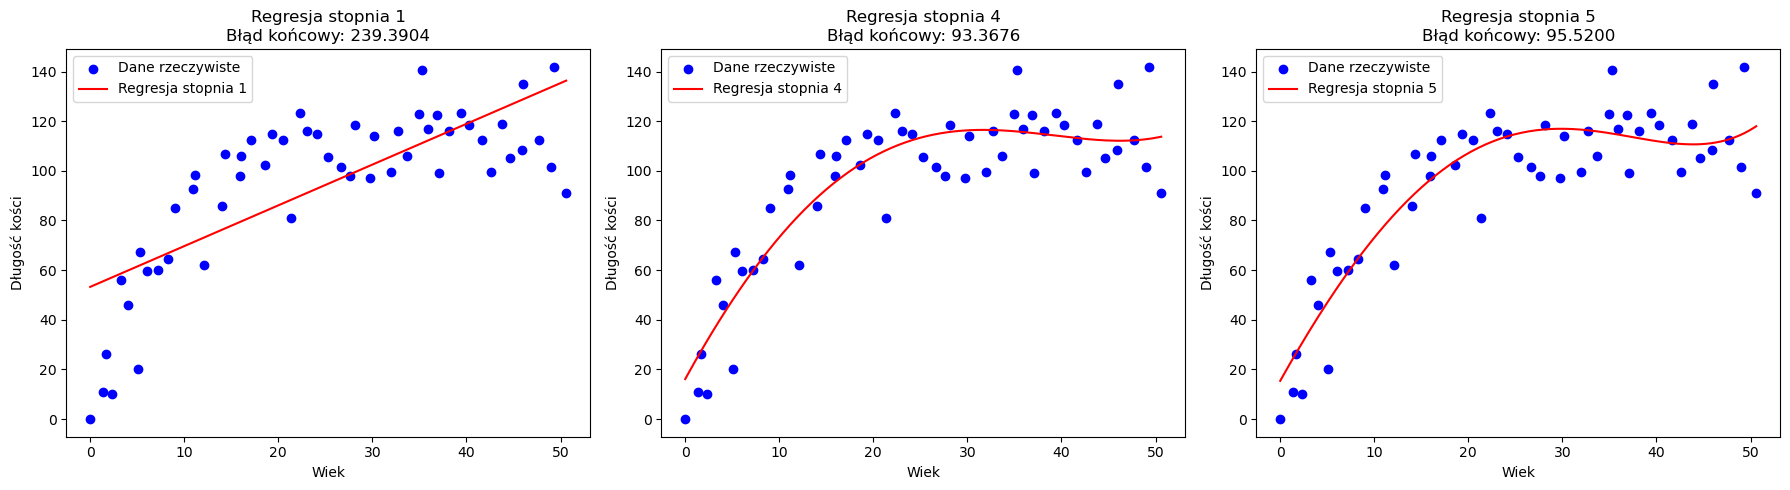

In [87]:
import matplotlib.pyplot as plt

n_polynomials = [1, 4, 5]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, n_poly in enumerate(n_polynomials):
    ax = axes[idx]
    ax.scatter(X, y, color='blue', label='Dane rzeczywiste')

    betas, error, X_mean, X_std = learn_and_fit(
        X, y,
        n_polynomial=n_poly,
        normalize=True,
        alpha=0.4,
        epoch=1000,
        threshold=0.00000001
    )

    X_plot = np.linspace(X.min(), X.max(), 200)
    X_poly_plot = transform_to_polynomial_feature(X_plot, n_poly)

    predictions = calculate_regression_function(X_poly_plot, np.array(betas[-1]))

    ax.plot(X_plot, predictions, color='red', label=f'Regresja stopnia {n_poly}')
    ax.set_title(f'Regresja stopnia {n_poly}\nBłąd końcowy: {error[-1]:.4f}')
    ax.set_xlabel('Wiek')
    ax.set_ylabel('Długość kości')
    ax.legend()
    print(f"Współczynniki regresji dla stopnia {n_poly}: {betas[-1]}")

plt.tight_layout()
plt.show()

Dla stopnia pierwszego funkcja regresji jest liniowa i nie dopasowuje się dobrze do danych, co skutkuje dużym błędem końcowym. Wraz ze wzrostem stopnia wielomianu (do 4 i 5) funkcja regresji staje się bardziej złożona i lepiej dopasowuje się do danych, co prowadzi do znacznego zmniejszenia błędu końcowego. Jednakże, zbyt wysoki stopień wielomianu może prowadzić do przeuczenia modelu, gdzie funkcja regresji zaczyna dopasowywać się do szumu w danych zamiast do rzeczywistego trendu. Jest to widoczne na wyresie dla stopnia 5, gdzie funkcja wykrzywia się znacząco w stronę obserwacji, które mogą być odstające (dwie wartości w okolicy Wiek = 50). Inną możliwą transformacją funkcji regresji mogłoby być użycie funkcji logarytmicznej - szybko rośnie na początku, a potem się wypłaszacza, co może lepiej odzwierciedlać rzeczywisty związek między wiekiem a długością kości.

### Zadanie 5

Odszukaj dowolny inny zbiór danych, dokonaj jego wizualizacji i przetestuj działania algorytmu

In [124]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
X = df['bmi'].values
y = data['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


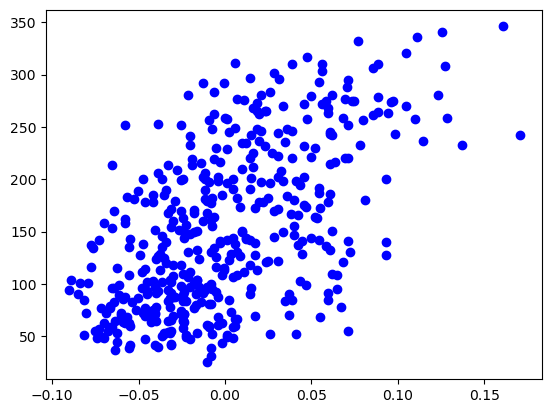

In [125]:
plt.scatter(X, y, color='blue', label='Data Points')

Współczynniki regresji dla stopnia 1: [152.13015257 949.41477924]
Współczynniki regresji dla stopnia 2: [151.46842611 941.03418363 293.94674737]
Współczynniki regresji dla stopnia 3: [   150.28629739    997.62391385   1144.80872441 -11580.29887239]


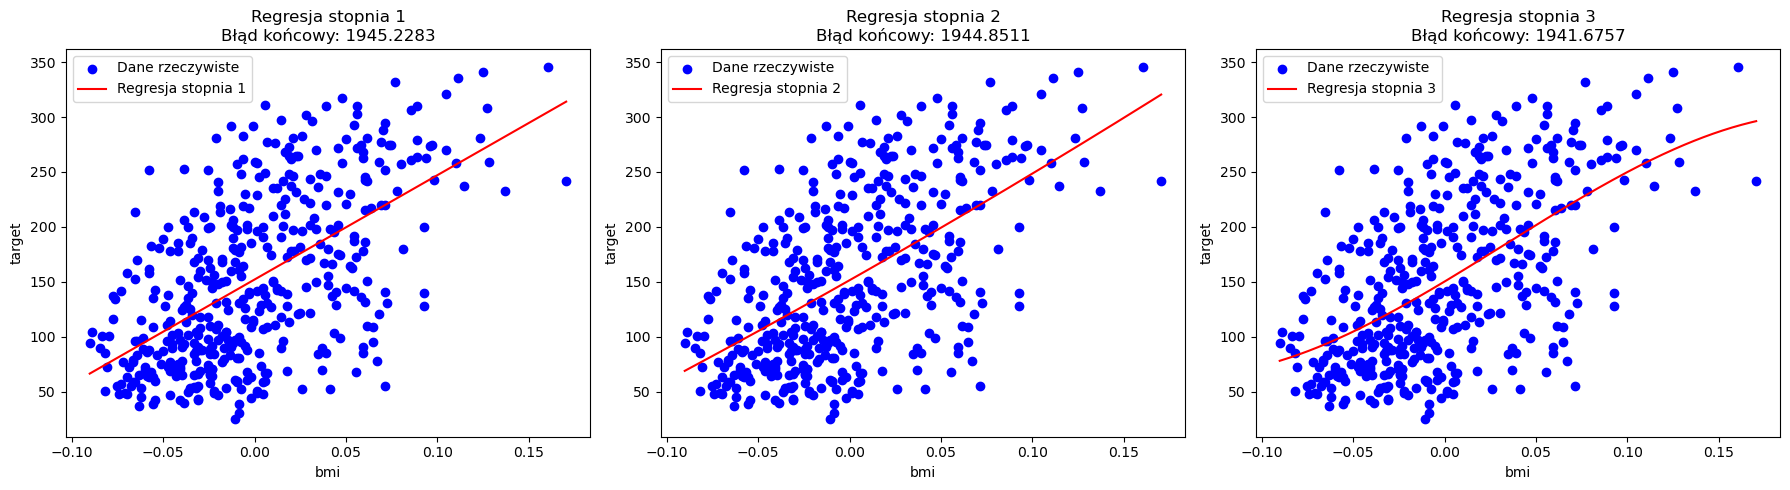

In [127]:
n_polynomials = [1, 2, 3]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, n_poly in enumerate(n_polynomials):
    ax = axes[idx]
    ax.scatter(X, y, color='blue', label='Dane rzeczywiste')

    betas, error, X_mean, X_std = learn_and_fit(
        X, y,
        n_polynomial=n_poly,
        normalize=True,
        alpha=0.4,
        epoch=1000,
        threshold=0.00000001
    )

    X_plot = np.linspace(X.min(), X.max(), 200)
    X_poly_plot = transform_to_polynomial_feature(X_plot, n_poly)

    predictions = calculate_regression_function(X_poly_plot, np.array(betas[-1]))

    ax.plot(X_plot, predictions, color='red', label=f'Regresja stopnia {n_poly}')
    ax.set_title(f'Regresja stopnia {n_poly}\nBłąd końcowy: {error[-1]:.4f}')
    ax.set_xlabel('bmi')
    ax.set_ylabel('target')
    ax.legend()
    print(f"Współczynniki regresji dla stopnia {n_poly}: {betas[-1]}")

plt.tight_layout()
plt.show()

Dane są zbyt rozproszone, aby regresja wyższych stopni miała sens. Wynik mógłby być lepszy w przypadku zastosowania regresji z wieloma cechami, wykorzystując więcej niż jedną zmienną niezależną.

### Zadanie 6

Zaproponuj metrykę oceny skuteczności działania algorytmu. Można wzorować się na metodach dostępnych pod odnośnikiem: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [131]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, calculate_regression_function(transform_to_polynomial_feature(X, 3), betas[-1]))
print(f"Mean Absolute Error dla regresji stopnia 3: {mae}")

Mean Absolute Error dla regresji stopnia 3: 51.57452561863885


Wybrana została metryka MAE ze względu na jej intuicyjność (taka sama jednostka co dane) oraz odporność na duże odchylenia w danych (ze względu na brak kwadratowania błędów, korzystne gdy obecne są wartości odstające, które mogą znacząco wpłynąć na wynik).